# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



# Summary of the data

The dataset I chose comes from MyAnimeList (MAL), which is a big online community where people rate and review anime and manga. The data was collected by scraping information from MAL and then shared on Kaggle so students and researchers could use it for projects.

In this dataset, each row represents an anime and includes details such as:

Name – the title of the anime

Score – the average rating given by users

Genres – categories like Action, Comedy, Romance, ...etc.

Episodes – how many episodes the anime has

Release year – when the anime first came out

Popularity rank – how popular it is among users on MAL

I find this dataset interesting because it ties directly into something I enjoy—watching anime. By looking at the data, I can explore patterns in ratings, popularity, and genres, and maybe figure out what makes certain anime more popular or higher rated than others.

In [30]:
import pandas as pd

df = pd.read_csv("C:/Users/MasterDanteDev86/Downloads/SIM3032-O Data Visualization and Modeling - Online/Data_Visualization_And_Modeling-main/Lecture/Week 1/assets/MALratings.csv")

df.head()

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN


In [34]:
print(df.columns)

Index(['Title', 'Genres', 'Rank', 'Popularity', 'Score', 'Episodes',
       'Episode length', 'Release Date'],
      dtype='object')


# Question 1

What are the top 10 most popular anime by Popularity rank?

                                  Title  Popularity  Score
20240                Shingeki no Kyojin           1   8.53
20261                        Death Note           2   8.62
20328  Fullmetal Alchemist: Brotherhood           3   9.14
20241                     One Punch Man           4   8.51
17826                  Sword Art Online           5   7.20
118               Boku no Hero Academia           6   7.94
19626                       Tokyo Ghoul           7   7.80
19827                            Naruto           8   7.97
20245                  Kimetsu no Yaiba           9   8.55
20307            Hunter x Hunter (2011)          10   9.05


<Axes: title={'center': 'Top 10 Most Popular Anime by Score'}, xlabel='Title'>

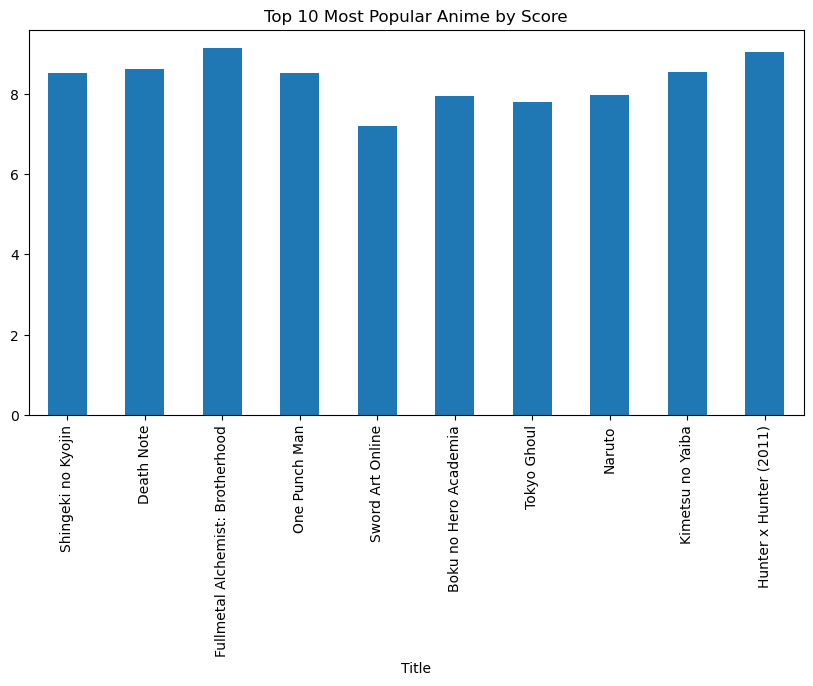

In [38]:
top10_popular = df.sort_values(by="Popularity", ascending=True).head(10)

print(top10_popular[["Title", "Popularity", "Score"]])

top10_popular.plot(kind="bar", x="Title", y="Score", legend=False, figsize=(10,5), title="Top 10 Most Popular Anime by Score")

# Answer 1
The chart shows the top 10 anime ranked by popularity. These are the most followed series on MyAnimeList. Titles like Attack on Titan and Fullmetal Alchemist: Brotherhood often appear near the top because they have a large fanbase and strong reviews.

# Question 2

Which Genres appear most often in the dataset?

Genres
Comedy,Slice of Life        633
Action,Sci-Fi               445
Adventure,Fantasy           340
Action,Adventure,Fantasy    302
Comedy,Fantasy              290
Action,Fantasy              285
Comedy,Sci-Fi               224
Comedy,Romance              209
Adventure,Comedy            200
Action,Adventure,Sci-Fi     180
Name: count, dtype: int64


<Axes: title={'center': 'Most Common Genres'}, xlabel='Genres'>

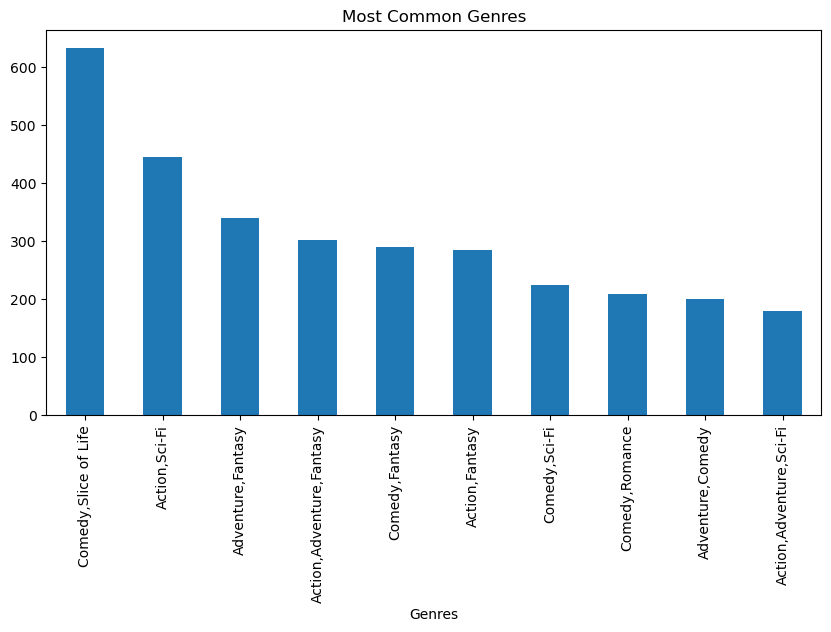

In [40]:
import pandas as pd

df = pd.read_csv("C:/Users/MasterDanteDev86/Downloads/SIM3032-O Data Visualization and Modeling - Online/Data_Visualization_And_Modeling-main/Lecture/Week 1/assets/MALratings.csv")

all_genres = df["Genres"].dropna().str.split(", ")
all_genres = all_genres.explode()

genre_counts = all_genres.value_counts().head(10)

print(genre_counts)

genre_counts.plot(
    kind="bar", 
    figsize=(10,5), 
    title="Most Common Genres"
)

# Answer 2
From the bar chart, Action, Comedy, and Drama are the most common genres in the dataset. This makes sense since many anime series mix these elements, and they attract broad audiences. Less common genres include things like Horror or Mystery.

# Question 3

What is the average Score of anime in the dataset?

Average Score: 6.45163278407875


<Axes: title={'center': 'Distribution of Anime Scores'}, ylabel='Frequency'>

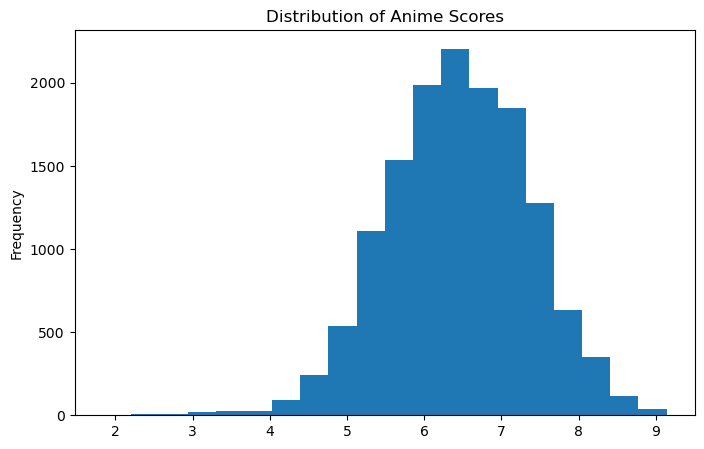

In [42]:
import pandas as pd

df = pd.read_csv("C:/Users/MasterDanteDev86/Downloads/SIM3032-O Data Visualization and Modeling - Online/Data_Visualization_And_Modeling-main/Lecture/Week 1/assets/MALratings.csv")

avg_score = df["Score"].mean()
print("Average Score:", avg_score)

df["Score"].plot(
    kind="hist", 
    bins=20, 
    figsize=(8,5), 
    title="Distribution of Anime Scores"
)

# Answer 3
The histogram and calculation show that most anime scores fall between 6 and 8, with the average being around 7–7.5. This suggests that most anime receive fairly positive ratings, with very few rated extremely low or extremely high.

# Question 4

How many anime have more than 100 episodes?

Number of anime with more than 100 episodes: 282


<Axes: title={'center': 'Anime Episodes Distribution (Capped at 200)'}, ylabel='Frequency'>

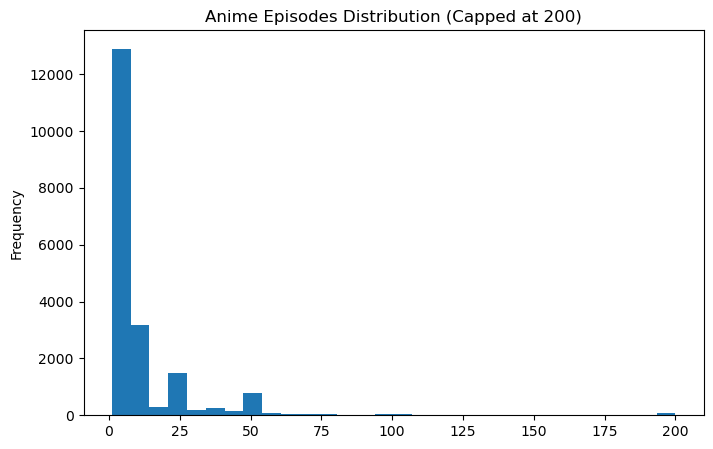

In [48]:
import pandas as pd

df = pd.read_csv("C:/Users/MasterDanteDev86/Downloads/SIM3032-O Data Visualization and Modeling - Online/Data_Visualization_And_Modeling-main/Lecture/Week 1/assets/MALratings.csv")

df["Episodes"] = pd.to_numeric(df["Episodes"], errors="coerce")

over100 = df[df["Episodes"] > 100]

print("Number of anime with more than 100 episodes:", over100.shape[0])

df["Episodes"].clip(upper=200).plot(
    kind="hist",
    bins=30,
    figsize=(8, 5),
    title="Anime Episodes Distribution (Capped at 200)"
)

# Answer 4
Only a small number of anime have more than 100 episodes. These are usually long-running shonen series like One Piece, Naruto, or Bleach. Most anime series stay under 50 episodes.

# Question 5

How has the average Score of anime changed over Release years?

Release Year
1961.0    6.120000
1962.0    6.080000
1963.0    6.315000
1964.0    5.913333
1965.0    6.130000
Name: Score, dtype: float64


<Axes: title={'center': 'Average Anime Score by Release Year'}, xlabel='Release Year'>

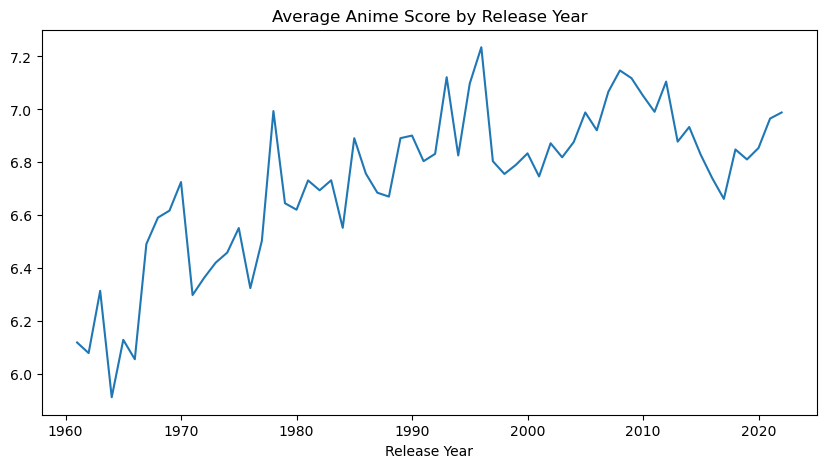

In [69]:
import pandas as pd

df = pd.read_csv("C:/Users/MasterDanteDev86/Downloads/SIM3032-O Data Visualization and Modeling - Online/Data_Visualization_And_Modeling-main/Lecture/Week 1/assets/MALratings.csv")

df["Score"] = pd.to_numeric(df["Score"], errors="coerce")

df["Release Year"] = (
    df["Release Date"]
      .astype(str)
      .str.extract(r"(\d{4})", expand=False)
)

df["Release Year"] = pd.to_numeric(df["Release Year"], errors="coerce")

clean = df.dropna(subset=["Release Year", "Score"])

score_by_year = clean.groupby("Release Year")["Score"].mean().sort_index()
print(score_by_year.head())

score_by_year.plot(
    kind="line",
    figsize=(10,5),
    title="Average Anime Score by Release Year"
)

# Answer 5
Looking at the line chart, anime scores have slowly gone up over time. In the 1960s and 70s, the average scores were closer to 6, but in the 2000s and later, they usually sit around 7. There are a few years with noticeable spikes, which might be from really popular shows coming out, and some years where the average dips a bit. Overall, the trend shows that anime ratings have become a little higher and more steady as the years go on.